# Numpy Vectors Exercise

### <div style="text-align: right">Group member: Jay, Shambhavi, Shelly</div>

In [1]:
# Import all the libraries
import numpy as np
from ineqpy.inequality import gini
from matplotlib import pyplot as plt

# Exercise 0


In [2]:
results = {}

# Exercise 1


In [3]:
# Import data
df = np.loadtxt(
    "https://raw.githubusercontent.com/nickeubank/practicaldatascience/master/Example_Data/us_household_incomes.txt"
)
# print(df)

# Exercise 2

Text(0.5, 1.0, 'Distribution of US Household Incomes')

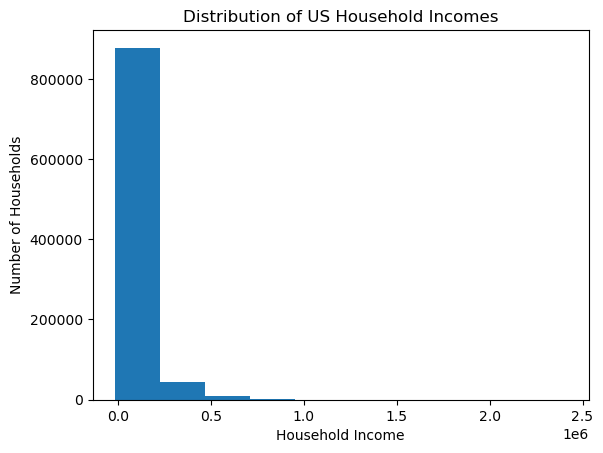

In [4]:
plt.hist(df)  # Create histogram
plt.xlabel("Household Income")
plt.ylabel("Number of Households")
plt.title("Distribution of US Household Incomes")

> **Ans:**  
>1. It is a right-skewed distribution, which means a few people hold very high values, while most people cluster at much lower values.   
> 
>2. That suggests inequality is relatively high — a small fraction holds disproportionately more compared to the majority.  
>
>

# Exercise 3

Text(0.5, 1.0, 'Distribution of US Household Incomes Below 500,000')

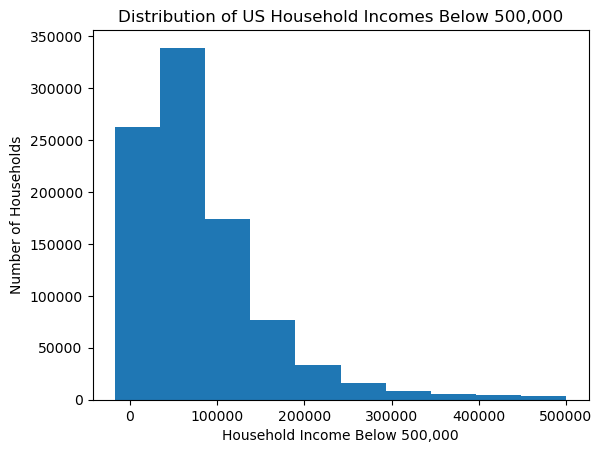

In [5]:
df_low = df[df < 500_000]
plt.hist(df_low)  # Create histogram
plt.xlabel("Household Income Below 500,000")
plt.ylabel("Number of Households")
plt.title("Distribution of US Household Incomes Below 500,000")

> **Ans:**  
>Even when we limit the data to households making less than \$ 500,000, the income distribution is still strongly right-skewed. Most households earn under \$ 100,000, while a small but significant number earn higher incomes, creating a long tail. This shows that the skewness of U.S. income distribution is evident across all income levels, not only due to extreme high earners. 

# Exercise 4

In [6]:
low = df[df < 20000]
count_low = len(low)
# print(count_low)
count_whole = len(df)
# print(count_whole)
ex4_share_below_poverty = count_low / count_whole
results["ex4_share_below_poverty"] = ex4_share_below_poverty
print(
    f"The proportion of households in the US which have an annual income under $20000 is: {ex4_share_below_poverty:.2f}"
)

The proportion of households in the US which have an annual income under $20000 is: 0.15


In [7]:
ex4_gini = gini(df)
results["ex4_gini"] = ex4_gini
print(f"The inequality index (Gini Index) of the household income is: {ex4_gini:.2f}")

The inequality index (Gini Index) of the household income is: 0.48


# Exercise 5

> The U.S. Gini index is relatively high compared to other developed countries such as Germany, Canada, and France, indicating greater income inequality than most advanced economies. However, it is still lower than in highly unequal countries such as South Africa or Brazil. This fits the common view that U.S. inequality is high among advanced economies, but not the highest worldwide.

# Exercise 6

In [8]:
policy_A = df.copy()
below_4 = df[df < 40000]
check1 = below_4 + 5000
policy_A[policy_A < 40000] = check1
ex6_gini_policy_a = gini(policy_A)
results["ex6_gini_policy_a"] = ex6_gini_policy_a
print(f"The new Gini index after policy A is: {ex6_gini_policy_a:.4f}")
# Round Gini values to 4 decimals for clarity.

The new Gini index after policy A is: 0.4602


In [9]:
policy_B = df.copy()
below_3 = df[df < 30000]
check2 = below_3 + 7000
policy_B[policy_B < 30000] = check2
ex6_gini_policy_b = gini(policy_B)
results["ex6_gini_policy_b"] = ex6_gini_policy_b
print(f"The new Gini index after policy B is: {ex6_gini_policy_b:.4f}")
# Round Gini values to 4 decimals for clarity.

The new Gini index after policy B is: 0.4583


In [10]:
if ex6_gini_policy_a < ex6_gini_policy_b:
    ex6_gini_which_reduced_more = "Policy A"
else:
    ex6_gini_which_reduced_more = "Policy B"
print(f"The policy which reduced the Gini Index more is {ex6_gini_which_reduced_more}.")
results["ex6_gini_which_reduced_more"] = ex6_gini_which_reduced_more

The policy which reduced the Gini Index more is Policy B.


> **Ans:**  
> The new Gini index after policy A is approximately 0.4602, The new Gini index after policy B is approximately 0.4583, and Policy B has lowered inequality more.

# Exercise 7

In [11]:
policy_C = df.copy()
above_25 = df[df > 250000]
tax = above_25 * 0.95
policy_C[policy_C > 250000] = tax
ex7_gini_policy_c = gini(policy_C)
results["ex7_gini_policy_c"] = ex7_gini_policy_c
print(f"The new Gini index after policy C is: {ex7_gini_policy_c:.2f}")

The new Gini index after policy C is: 0.48


# Exercise 8

In [12]:
policy_D = df.copy()
above_25 = df[df > 250000]
tax = above_25 * 0.95
share = above_25 * 0.05
ex8_revenue_raised = share.sum()
results["ex8_revenue_raised"] = ex8_revenue_raised
print(
    f"The revenue raised by taxing those households earning above $250000 with 5% is ${ex8_revenue_raised:.2f}"
)

The revenue raised by taxing those households earning above $250000 with 5% is $929623340.85


In [13]:
share_D = ex8_revenue_raised / len(below_3)
# below_3 was created in policy_B
ex9_transfers = share_D
results["ex9_transfers"] = ex9_transfers
print(
    f"The amount that would be transferred to every household earning below $30000 is ${ex9_transfers:.2f}"
)

The amount that would be transferred to every household earning below $30000 is $4208.23


In [14]:
policy_D[policy_D > 250000] = tax
policy_D[policy_D < 30000] = below_3 + share_D  # below_3 was created in policy_B
ex10_gini_policy_d = gini(policy_D)
results["ex10_gini_policy_d"] = ex10_gini_policy_d
print(f"The new Gini index after policy D is: {ex10_gini_policy_d:.4f}")
# Round Gini values to 4 decimals for clarity.

The new Gini index after policy D is: 0.4617


In [15]:
below_4 = df[df < 40000]
share_E = share.sum() / len(below_4)
policy_E = df.copy()
policy_E[policy_E > 250000] = tax  # tax was created in policy_D
policy_E[policy_E < 40000] = below_4 + share_E
ex11_gini_policy_e = gini(policy_E)
results["ex11_gini_policy_e"] = ex11_gini_policy_e
print(f"The new Gini index after policy E is: {ex11_gini_policy_e:.4f}")
# Round Gini values to 4 decimals for clarity.

The new Gini index after policy E is: 0.4626


In [16]:
if ex10_gini_policy_d < ex11_gini_policy_e:
    ex12_policy_recommendation = "Policy D"
else:
    ex12_policy_recommendation = "Policy E"
results["ex12_policy_recommendation"] = ex12_policy_recommendation
print(f"The policy recommended is: {ex12_policy_recommendation}")

The policy recommended is: Policy D


> **Ans:**  
> The new Gini index after policy D is approximately 0.4617, The new Gini index after policy E is approximately 0.4626, and we would like to recommend policy D.

# Result Check


In [17]:
results

{'ex4_share_below_poverty': 0.14711442173300704,
 'ex4_gini': np.float64(0.4810925546879187),
 'ex6_gini_policy_a': np.float64(0.4602468507489463),
 'ex6_gini_policy_b': np.float64(0.4582821778789712),
 'ex6_gini_which_reduced_more': 'Policy B',
 'ex7_gini_policy_c': np.float64(0.47561738439007023),
 'ex8_revenue_raised': np.float64(929623340.85),
 'ex9_transfers': np.float64(4208.230382379836),
 'ex10_gini_policy_d': np.float64(0.4616690057020551),
 'ex11_gini_policy_e': np.float64(0.46264861963052545),
 'ex12_policy_recommendation': 'Policy D'}

In [18]:
assert set(results.keys()) == {
    "ex4_share_below_poverty",
    "ex4_gini",
    "ex6_gini_policy_a",
    "ex6_gini_policy_b",
    "ex6_gini_which_reduced_more",
    "ex7_gini_policy_c",
    "ex8_revenue_raised",
    "ex9_transfers",
    "ex10_gini_policy_d",
    "ex11_gini_policy_e",
    "ex12_policy_recommendation",
}